In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

log = lambda x: np.log(x+0j)
sqrt = lambda x: np.sqrt(x+0j)

In [2]:
# Input data from PDG 2023
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mtau = 1.77686 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
s2Weff = 0.23155 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W
aem = 1/137.035999180
aem_mZ = 1/127.951

Gammatau_SM = 0.08377 #GeV
Gammahad_SM = 1.7408565063298496 #GeV
Gammatau_exp = 0.08408 #GeV
Gammatau_err = 0.00022 #GeV
# arXiv:1912.02067 Table B.13
Rtau_exp = 20.7644
Rtau_err = 0.0448

Lambda = 1000 #GeV
mu = 4*np.pi*Lambda


## $Z\to\tau\tau$ decays

\begin{equation}
\begin{split}
    &F^V_{1,\text{finite}}= c\,\frac{c_\tau^2 m_\tau^2}{32\pi^2\Lambda^2} \left(1+ \log \frac{-\mu^2}{m_Z^2}\right);\\
    &F^A_{1,\text{finite}}= \frac{c_\tau^2 m_\tau^2}{32\pi^2\Lambda^2} \left(1+ \log \frac{-\mu^2}{m_Z^2}\right);\\
    &F_{\tau ,\text{finite}}= - \frac{m_\tau^2 c_\tau^2}{\Lambda^2} \frac{1}{16\pi^2} \left[\frac{1}{4(m_\tau^2-m_\phi^2)^2} \left(3m_\tau^4 - 4 m_\tau^2 m_\phi^2 + m_\phi^4 + 2 m_\phi^2 (m_\phi^2-2m_\tau^2) \ln \frac{m_\tau^2}{m_\phi^2} - 2 (m_\tau^2-m_\phi^2)^2\ln \frac{m_\tau^2}{\mu^2}\right)\right];\\
    &F^D_{1,\text{finite}} = c\, \frac{c_\tau^2 m_\tau^2}{\Lambda^2}\frac{1}{32\pi^2} \frac{1}{m_Z^2 m_\tau^2}\left[(m_\phi^4-2m_\phi^2m_\tau^2) \log \frac{m_\phi^2}{m_\tau^2} + 2 m_\tau^4 \log\frac{-m_\tau^2}{m_Z^2} - 2 m_\phi^2 \left(m_\tau^2 + m_\phi^2 \, h\left(\frac{m_\tau}{m_\phi}\right) \right)\right]\\
\end{split}
\end{equation}

where we have defined the loop function 

\begin{equation}
    h(x) = \begin{cases} \sqrt{1-4x^2} \ln \frac{1+\sqrt{1+4x^2}}{2x}, & \text{ if } x^2\le1/4\\
                         -\sqrt{4x^2-1} \arctan \sqrt{4x^2-1}, & \text{ if } x^2>1/4\\
    \end{cases}
\end{equation}

And where we recall that

\begin{equation}
\begin{split}
    &\delta F^V = F^V_{1,\text{finite}} +  F_{\tau, \text{finite}};\\
    &\delta F^A = F^A_{1,\text{finite}} +  F_{\tau, \text{finite}};\\
    &\delta F^D = F^D_{1,\text{finite}}\\
\end{split}
\end{equation}

In [3]:
F1Afin: complex = mtau**2/(32*np.pi**2*Lambda**2)*(1+log(-mu**2/mZ**2))

F1Vfin = c*F1Afin

def Ftaufin(mphi) -> complex:
    return -mtau**2/(64*np.pi**2*Lambda**2*(mtau**2-mphi**2)**2)*(3*mtau**4-4*mphi**2*mtau**2+mphi**4+2*mphi**2*(mphi**2-mtau**2)*log(mtau**2/mphi**2)-2*(mtau**2-mphi**2)**2*log(mtau**2/mu**2))

def F1Dfin(mphi: float) -> complex:
    def h(x):
        if x < 0.5:
            return (1-4*x**2)**0.5*log((1+(1+4*x**2)**0.5)/(2*x))
        else:
            return -(4*x**2-1)**0.5*np.arctan(4*x**2-1)
    return c/(32*np.pi**2*Lambda**2*mZ**2*mtau**2)*((mphi**4-2*mphi**2*mtau**2)*log(mphi**2/mtau**2)+2*mtau**4*log(-mtau**2/mZ**2)-2*mphi**2*(mtau**2+mphi**2*h(mtau/mphi)))

deltaFA = lambda mphi: F1Afin + Ftaufin(mphi)
deltaFV = lambda mphi: F1Vfin + Ftaufin(mphi)

\begin{equation}
\begin{split}
F_\tau^m &=  - \frac{m_\tau^2 C_\tau^2}{\Lambda^2} \frac{1}{16\pi^2}\frac{1}{\varepsilon_X} + \frac{m_\tau^2 C_\tau^2}{\Lambda^2} \frac{1}{16\pi^2} \left[\frac{m_\phi^2}{m_\phi^2-m_\tau^2}\ln \frac{m_\tau^2}{m_\phi^2} - 1 + \ln \frac{m_\tau^2}{\mu^2}\right]\\
%
F_\phi^m &=  -\frac{m_\tau^2 C_\tau^2}{\Lambda^2} \frac{1}{4\pi^2}\frac{1}{\varepsilon_X} - \frac{m_\tau^2 C_\tau^2}{\Lambda^2} \frac{1}{4\pi^2} \left[1 + \ln \frac{\mu^2}{m_\tau^2}\right]\\
\end{split}
\end{equation}

In [4]:
Fphim = -mtau**2*(1+log(mu**2/mtau**2))/(4*np.pi**2*Lambda**2)

def Ftaum(mphi):
    return mtau**2*(mphi**2/(mphi**2-mtau**2)*log(mtau**2/mphi**2)-1+log(mtau**2/mu**2))/(16*np.pi**2*Lambda**2)

$$  \Gamma (Z\rightarrow \tau^+ \tau^-) = \Gamma_{\text{SM}}^{\text{1-loop}}+  \frac{m_Z}{6\pi}\sqrt{1-4t} \left(\frac{g}{4c_w}\right)^2\left[ \, c \, \text{Re} (\delta F_V)\left(1 + 2 t\right) - \, \text{Re} (\delta F_A) \left(1 - 4 t\right) +3 \, c \, \text{Im} \left( \delta F_D\right)+ \frac{1}{2}\frac{2F_\tau^m  -F_\phi^m}{1-4t}\right] $$

In [5]:
def deltaGamma_loop(mphi: float) -> float:
    return prefactor*mZ/(6*np.pi)*(1-4*t)**0.5*(c*deltaFV(mphi).real*(1+2*t)-deltaFA(mphi).real*(1-4*t)+3*c*F1Dfin(mphi).imag+0.5*(2*Ftaum(mphi)-Fphim)/(1-4*t))

In [6]:
mphi_list = [10**x for x in np.linspace(-3, 1, 500)]

In [7]:
bound_Gamma_upper1 = [((Gammatau_exp+Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
bound_Gamma_upper2 = [((Gammatau_exp+2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]

In [8]:
bound_Gamma_lower1 = [((Gammatau_exp-Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
bound_Gamma_lower2 = [((Gammatau_exp-2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]

/home/jorge/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


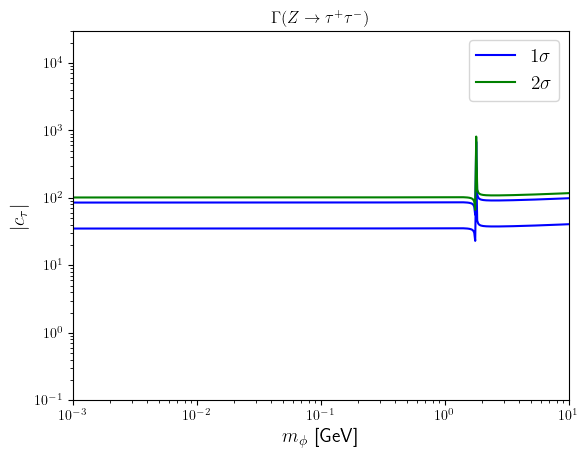

In [9]:
plt.loglog(mphi_list, bound_Gamma_lower1, color='blue', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_Gamma_upper1, color='blue')
plt.loglog(mphi_list, bound_Gamma_lower2, color='green', label=r'$2 \sigma$')
plt.loglog(mphi_list, bound_Gamma_upper2, color='green')
plt.title(r"$\Gamma(Z\to\tau^+\tau^-)$")
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('Gamma.png')

Text(0, 0.5, '$\\delta \\Gamma(Z\\to\\tau^+\\tau^-)$')

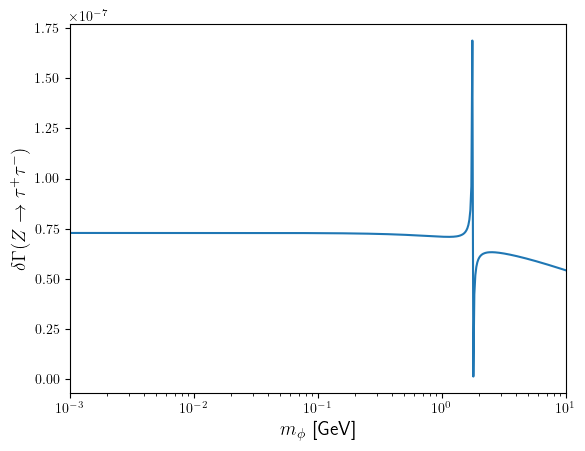

In [10]:
plt.semilogx(mphi_list, [deltaGamma_loop(m).real for m in mphi_list])
#plt.ylim(0, 2e-6)
plt.xlim(1e-3, 10)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$\delta \Gamma(Z\to\tau^+\tau^-)$', fontsize=14)

In [11]:
bound_Rtau = [((Gammahad_SM/(Rtau_exp-Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]

/home/jorge/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


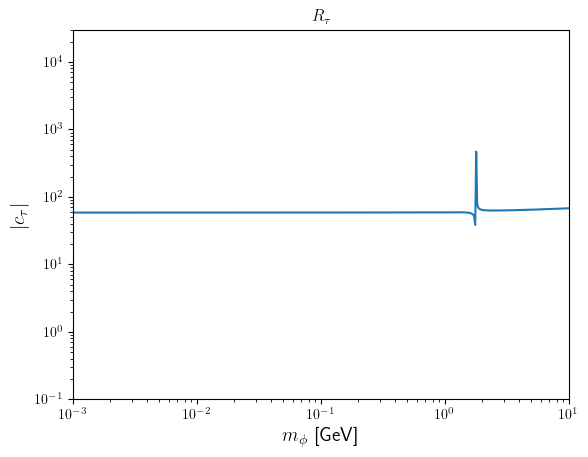

In [12]:
plt.loglog(mphi_list, bound_Rtau)
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$R_\tau$")
plt.savefig('Rtau.png')

In [13]:
Atau_SM = 0.1468 # PDG Table 10.5 (A_e = A_tau)
Atau_exp = 0.143
Atau_err = 0.004

$$A_\tau = A_\mathrm{SM}^\mathrm{1-loop}+2\frac{c^2-1}{(c^2+1)^2}[c\, \text{Re}  (\delta F^A) +\, \text{Re}  (\delta F^V)]-3\frac{c^2-1}{(c^2+1)^2 (1-t)}\, \text{Im}(\delta F^D)\,.$$

In [14]:
def Atau_phi(mphi):
    return 2*(c**2-1)/(c**2+1)**2*(c*deltaFA(mphi).real+deltaFV(mphi).real)-3*(c**-1)/(c**2+1)**2/(1-mtau**2/mZ**2)*F1Dfin(mphi).imag

In [15]:
deltaAtau = [Atau_phi(m) for m in mphi_list]

bound_Atau = []
for dA in deltaAtau:
    if dA < 0:
        bound_Atau.append(((Atau_exp-Atau_err-Atau_SM)/dA)**0.5)
    else:
        bound_Atau.append(((Atau_exp+Atau_err-Atau_SM)/dA)**0.5)        

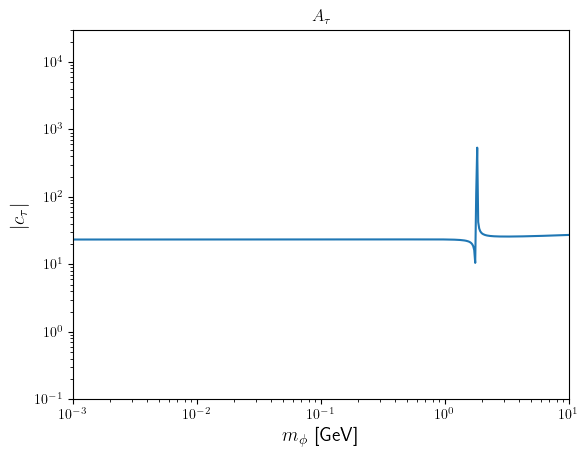

In [36]:
plt.loglog(mphi_list, bound_Atau)
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$A_\tau$")
plt.savefig('Atau.png')

In [17]:
gV_exp = -0.0366
gV_err =  0.0010

gA_exp = -0.50204
gA_err =  0.00064

s2W_exp = 0.23148
s2W_err = 0.00033

In [18]:
Gamma0 = mZ/(3*np.pi)*prefactor*(1-4*mtau**2/mZ**2)**0.5*(1+0.75*aem_mZ/np.pi)
c_SM = (1-(1-Atau_SM**2)**0.5)/Atau_SM
gA_SM = -((Gammatau_SM/Gamma0)/((1-4*mtau**2/mZ**2) +c_SM**2*(1+mtau**2/mZ**2)))**0.5
gV_SM = gA_SM * c_SM
s2W_SM = 0.25*(1-c_SM)

In [19]:
coeff_gA_Gamma = 2 * Gamma0 * gA_SM *(1-4*mtau**2/mZ**2)
coeff_gV_Gamma = 2 * Gamma0 * gV_SM*(1+mtau**2/mZ**2)
coeff_gA_Atau = 2*gV_SM*(gV_SM**2-gA_SM**2)/(gA_SM**2+gV_SM**2)**2
coeff_gV_Atau = -2*gA_SM*(gV_SM**2-gA_SM**2)/(gA_SM**2+gV_SM**2)**2

coeff_matrix = np.matrix([[coeff_gA_Gamma, coeff_gV_Gamma], [coeff_gA_Atau, coeff_gV_Atau]]).I

In [20]:
gvector = [coeff_matrix * np.matrix([deltaGamma_loop(m), Atau_phi(m)]).T for m in mphi_list]

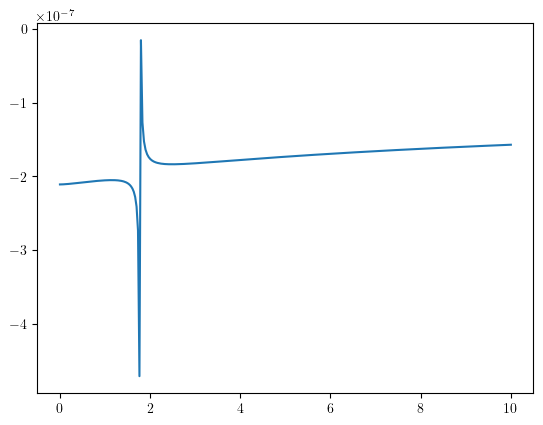

In [21]:
gA_list = [float(g[0].real) for g in gvector]
plt.plot(mphi_list, gA_list)

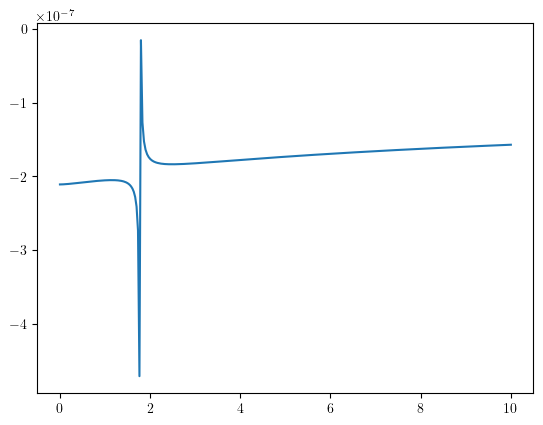

In [22]:
gV_list = [float(g[1].real) for g in gvector]
plt.plot(mphi_list, gA_list)

In [23]:
bound_gV_lower = []
bound_gV_upper = []
bound_gA_lower = []
bound_gA_upper = []
bound_gA_lower2 = []
bound_gA_upper2 = []
bound_s2W_lower = []
bound_s2W_upper = []
for g in gvector:
    b1l = ((gA_SM-gA_exp+gA_err)/float(g[0].real))
    b1u = ((gA_SM-gA_exp-gA_err)/float(g[0].real))
    b2l = ((gA_SM-gA_exp+2*gA_err)/float(g[0].real))
    b2u = ((gA_SM-gA_exp-2*gA_err)/float(g[0].real))
    if b1l > 0:
        bound_gA_lower.append(b1l**0.5)
    else:
        bound_gA_lower.append(float('NaN'))
    if b1u > 0:
        bound_gA_upper.append(b1u**0.5)
    else:
        bound_gA_upper.append(float('NaN'))
    if b2l > 0:
        bound_gA_lower2.append(b2l**0.5)
    else:
        bound_gA_lower2.append(float('NaN'))
    if b2u > 0:
        bound_gA_upper2.append(b2u**0.5)
    else:
        bound_gA_upper2.append(float('NaN'))
    bvl = ((gV_SM-gV_exp+gV_err)/float(g[1].real))
    bvu = ((gV_SM-gV_exp-gV_err)/float(g[1].real))
    if bvl > 0:
        bound_gV_lower.append(bvl**0.5)
    else:
        bound_gV_lower.append(float('NaN'))
    if bvu > 0:
        bound_gV_upper.append(bvu**0.5)
    else:
        bound_gV_upper.append(float('NaN'))
    s2W_calc = 0.25*(1-float(g[1].real)/float(g[0].real))
    bsl = ((s2W_SM-s2W_exp+s2W_err)/s2W_calc)
    bsu = ((s2W_SM-s2W_exp+s2W_err)/s2W_calc)


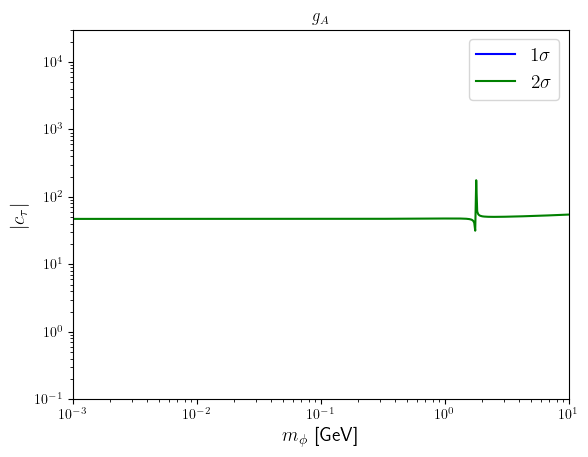

In [24]:
plt.loglog(mphi_list, bound_gA_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_gA_upper, color='b')
plt.loglog(mphi_list, bound_gA_lower2, color='g', label=r'$2 \sigma$')
plt.loglog(mphi_list, bound_gA_upper2, color='g')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$g_A$")
plt.legend(fontsize=14)
plt.savefig('gA.png')

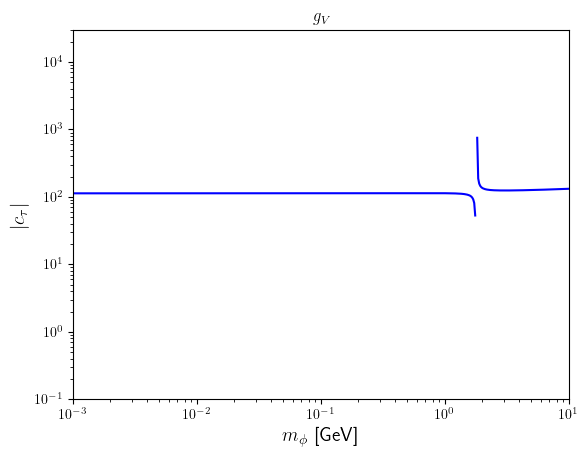

In [25]:
plt.loglog(mphi_list, bound_gV_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_gV_upper, color='b')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$g_V$")
plt.savefig('gV.png')

In [26]:
def delta_s2W(mphi):
    return -0.25*(1-(1-Atau_SM**2)**0.5)/(Atau_SM**2*(1-Atau_SM**2)**0.5)*Atau_phi(mphi)

In [27]:
bound_s2W_lower = []
bound_s2W_upper = []

for m in mphi_list:
    ds2W = delta_s2W(m)
    bl = (s2W_exp-s2W_exp+s2W_err)/ds2W
    bu = (s2W_exp-s2W_exp-s2W_err)/ds2W
    if bl > 0:
        bound_s2W_lower.append(bl**0.5)
    else:
        bound_s2W_lower.append(float('NaN'))
    if bu > 0:
        bound_s2W_upper.append(bu**0.5)
    else:
        bound_s2W_upper.append(float('NaN'))

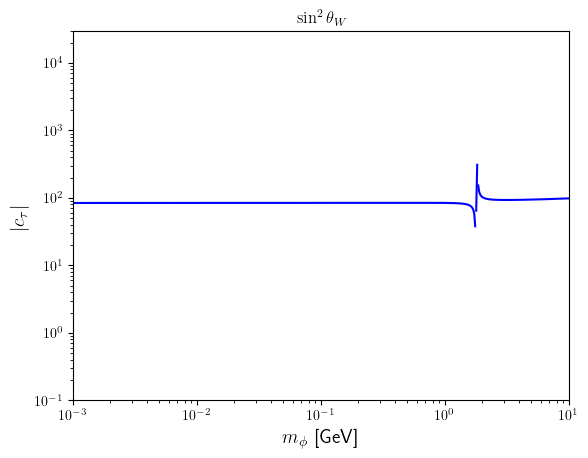

In [28]:
plt.loglog(mphi_list, bound_s2W_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_s2W_upper, color='b')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$\sin^2\theta_W$")
plt.savefig('s2W.png')

In [29]:
(gA_SM-gA_exp)/gA_err

1.2649557876271214

In [30]:
(gV_SM-gV_exp)/gV_err

-0.39068840184249

In [31]:
(s2W_SM-s2W_exp)/s2W_err

0.21229836163062746

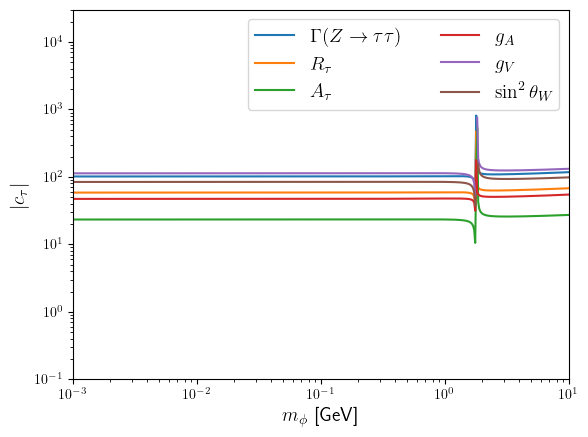

In [32]:
plt.loglog(mphi_list, bound_Gamma_upper2, label=r'$\Gamma(Z\to\tau\tau)$')
plt.loglog(mphi_list, bound_Rtau, label=r'$R_\tau$')
plt.loglog(mphi_list, bound_Atau, label=r'$A_\tau$')
plt.loglog(mphi_list, bound_gA_upper2, label=r'$g_A$')
plt.loglog(mphi_list, bound_gV_upper, label=r'$g_V$')
plt.loglog(mphi_list, bound_s2W_upper, label=r'$\sin^2\theta_W$')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.legend(fontsize=14, ncol=2)
plt.savefig('Zdecays.png')

## $\tau$ decays

\begin{equation}
\Gamma_{\text{1L}} = \Gamma_{\text{1L}}^{\text{SM}} + \left(\frac{G_F m_\tau^5}{192\pi^3}\right)_{\text{TL}} \left( \delta_L^\tau  + 5 F_{\tau, \text{finite}}^m \right)= \Gamma_{\text{1L}}^{\text{SM}} + \left(\frac{G_F m_\tau^5}{192\pi^3}\right)_{\text{TL}}\left( F_{\tau, \text{finite}} + 5 F^m_{\tau, \text{finite}}\right)
\end{equation}

where once again the factor $ 5 F^m_{\tau, \text{finite}}$ is due to one-loop corrections to the phase-space for the decay. It plays no role in branching ratios, where it can be neglected (it would cancel against the same correction stemming from the denominator in the ratio).

In [33]:
#1208.6583
rmu_pi = 0.016+0.008
rmu_K = 0.037+0.016
rmu_tau = -0.0014+0.0044
re_tau = -0.0032+0.0042

hbar = 6.582119569e-25 #GeV s
tau_tau = 2.906e-13 #s
Gammatot = hbar/tau_tau

#flavio
BRmu = 0.17289410015012727
BRe = 0.177772058705607
BRK = 0.007091348046914248
BRpi = 0.10847544821474381

fpi = 0.1302
fK = 0.1554
mpi = 0.13957039
mK = 0.493677
Vud = 0.9743977868919859
Vus = 0.2248

In [34]:
Gamma_lep = GF**2 * mtau**5/(192*np.pi**3)
Gamma_pi = GF**2*Vud**2*fpi**2/(16*np.pi)*(mtau**2-mpi**2)**2/mtau
Gamma_K = GF**2*Vus**2*fK**2/(16*np.pi)*(mtau**2-mK**2)**2/mtau

bound_rmupi = [(-rmu_pi/(1+rmu_pi)*BRpi*Gammatot/(Gamma_pi * Ftaufin(m).real))**0.5 for m in mphi_list]
bound_rmuK = [(-rmu_K/(1+rmu_K)*BRK*Gammatot/(Gamma_K * Ftaufin(m).real))**0.5 for m in mphi_list]
bound_rmu = [(-rmu_tau/(1+rmu_tau)*BRmu*Gammatot/(Gamma_lep * Ftaufin(m).real))**0.5 for m in mphi_list]
bound_re = [(-re_tau/(1+re_tau)*BRe*Gammatot/(Gamma_lep * Ftaufin(m).real))**0.5 for m in mphi_list]

/tmp/ipykernel_36713/3447479180.py:5: RuntimeWarning: invalid value encountered in double_scalars
  bound_rmupi = [(-rmu_pi/(1+rmu_pi)*BRpi*Gammatot/(Gamma_pi * Ftaufin(m).real))**0.5 for m in mphi_list]
/tmp/ipykernel_36713/3447479180.py:6: RuntimeWarning: invalid value encountered in double_scalars
  bound_rmuK = [(-rmu_K/(1+rmu_K)*BRK*Gammatot/(Gamma_K * Ftaufin(m).real))**0.5 for m in mphi_list]
/tmp/ipykernel_36713/3447479180.py:7: RuntimeWarning: invalid value encountered in double_scalars
  bound_rmu = [(-rmu_tau/(1+rmu_tau)*BRmu*Gammatot/(Gamma_lep * Ftaufin(m).real))**0.5 for m in mphi_list]
/tmp/ipykernel_36713/3447479180.py:8: RuntimeWarning: invalid value encountered in double_scalars
  bound_re = [(-re_tau/(1+re_tau)*BRe*Gammatot/(Gamma_lep * Ftaufin(m).real))**0.5 for m in mphi_list]


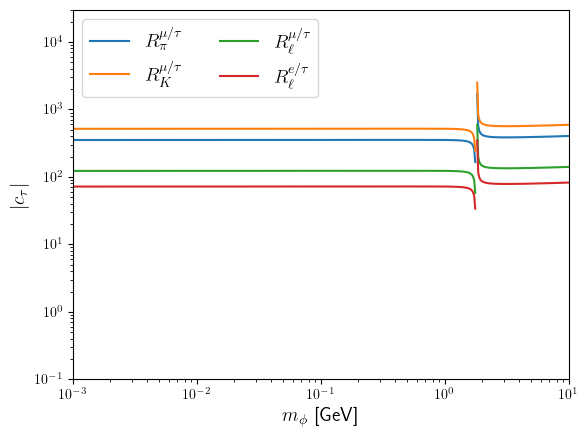

In [35]:
plt.loglog(mphi_list, bound_rmupi, label=r'$R_\pi^{\mu/\tau}$')
plt.loglog(mphi_list, bound_rmuK, label=r'$R_K^{\mu/\tau}$')
plt.loglog(mphi_list, bound_rmu, label=r'$R_\ell^{\mu/\tau}$')
plt.loglog(mphi_list, bound_re, label=r'$R_\ell^{e/\tau}$')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.legend(fontsize=14, ncol=2)
plt.savefig('taudecays.png')